<a href="https://colab.research.google.com/github/lsilva18/EvolutionaryComputation/blob/main/List04Ex01_UnconstrainedOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar pacote DEAP e importar o que for necessário

In [ ]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [ ]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
import matplotlib.pyplot  as plt
from deap import algorithms, base
from deap import creator, tools

## O problema - minimização não restrita

Ajustar a uma exponencial do tipo $𝒂𝒆^{𝒃𝒙}$ a um conjunto de pontos ($x_i$, $y_i$) dados pela seguinte tabela.

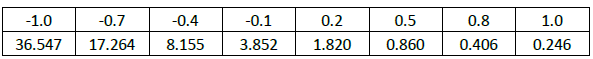

## Constantes do problema

In [ ]:
LIMINF, LIMSUP = -100, 100
DADOS_X = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0])
DADOS_Y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])
IND_SIZE=2 # quantidade de variaveis de decisao 
random.seed(10)

## Preparação para Otimização


### Função Objetivo

In [ ]:
# Função Objetivo
def objective_function(individual):
    a = individual[0]
    b = individual[1]
    funcao_calculada = a * np.exp(b * DADOS_X)
    tolerancia = np.sum(np.abs(DADOS_Y - funcao_calculada))
    return np.squeeze(tolerancia),

### Indivíduos e Variáveis de Decisão

In [ ]:
creator.create("FitnessMin", base.Fitness  , weights=(-1.0,))         # função objetivo: <nome>, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMin )      # indivíduo

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_real", random.uniform, LIMINF, LIMSUP)   # variáveis reais

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, IND_SIZE)   # IND_SIZE: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                          # lista de indivíduos

### Operadores

In [ ]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=.5, low=LIMINF, up=LIMSUP)
toolbox.register("mutate", tools.mutGaussian , mu=0, sigma=LIMSUP, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

## Criando população e hall da fama

In [ ]:
pop = toolbox.population(n=100)                            # inicialização da pop
hof = tools.HallOfFame(1)                                  # melhor indivíduo

## Definindo estatisticas desejáveis

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	7.97798e+41	6.89951e+42	74.7646	6.91927e+43
1  	59    	2.3433e+33 	2.32818e+34	74.7646	2.33995e+35
2  	49    	2.7194e+38 	2.70577e+39	74.7646	2.7194e+40 
3  	46    	37312.5    	162489     	74.7646	1.44194e+06
4  	51    	2.03085e+11	1.68181e+12	45.8712	1.65085e+13
5  	51    	8.80114e+80	8.75702e+81	45.489 	8.80114e+82
6  	61    	81.5116    	47.5037    	40.1677	400.831    
7  	59    	4.45322e+14	4.4309e+15 	33.4997	4.45322e+16
8  	53    	1.33712e+09	1.33041e+10	29.1143	1.33712e+11
9  	59    	48.8908    	8.13259    	28.2024	93.7577    
10 	55    	44.3326    	16.4919    	9.61019	183.602    
11 	64    	37.869     	16.3278    	6.20908	114.546    
12 	38    	1.36311e+49	1.35628e+50	6.20908	1.36311e+51
13 	52    	23.4376    	30.6457    	6.20908	209.37     
14 	54    	13.5927    	14.3288    	2.84671	86.3599    
15 	47    	26.8647    	171.917    	0.266732	1730.97    
16 	54    	6.23009    	2.39361    	0.266732	14.7374    
17 	52  

## Resultados

In [ ]:
# Melhor solução
print("Melhor Indivíduo:")
print("a= "+ str(hof[0][0])+ " b = "+ str(hof[0][1]))

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
np.squeeze(objective_function(hof[0]))

Melhor Indivíduo:
a= 3.035496247613133 b = -2.488224184063779
Melhor Resultado da Função Objetivo:


array(0.21440361)

### Gráfico da evolução

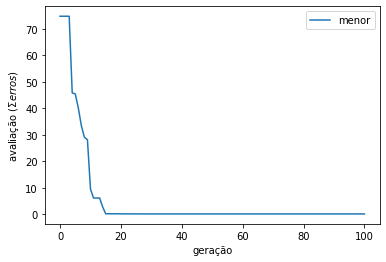

In [ ]:
gen, min = log.select('gen', 'min')
plt.plot(gen, min, label='menor')
plt.ylabel('avaliação ($\Sigma erros$)')
plt.xlabel('geração')
plt.legend();

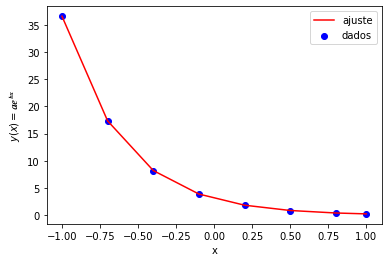

In [ ]:
a, b = hof[0]
plt.scatter( DADOS_X, DADOS_Y, label='dados', c = 'b')
plt.plot(DADOS_X, a*np.exp(b*DADOS_X), label = 'ajuste', c = 'r')
plt.xlabel('x')
plt.ylabel('$y(x) = 𝒂𝒆^{𝒃𝒙}$')
plt.legend();